In [1]:
import json
with open("apts_db.json") as f:
    apts_db = json.loads(f.read())

In [4]:
import pandas as pd
apts_short = [
    (
        a[0]["floor"]["abbreviation"], 
        int(a[0]["surface"].split(" ")[0]), 
        a[0]["price"]["value"], 
        a[0]["location"]["macrozone"]
    ) 
    for a in [b['realEstate']['properties'] for b in apts_db] if "floor" in a[0]
]

<Axes: ylabel='Frequency'>

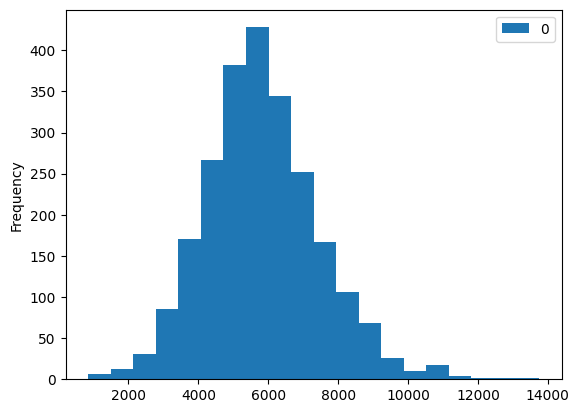

In [27]:
df = pd.DataFrame([(int(f[2]/f[1]), f[3], f[1]) for f in apts_short])
df[[0]].plot.hist(bins=20, )

0    Axes(0.125,0.11;0.775x0.77)
dtype: object

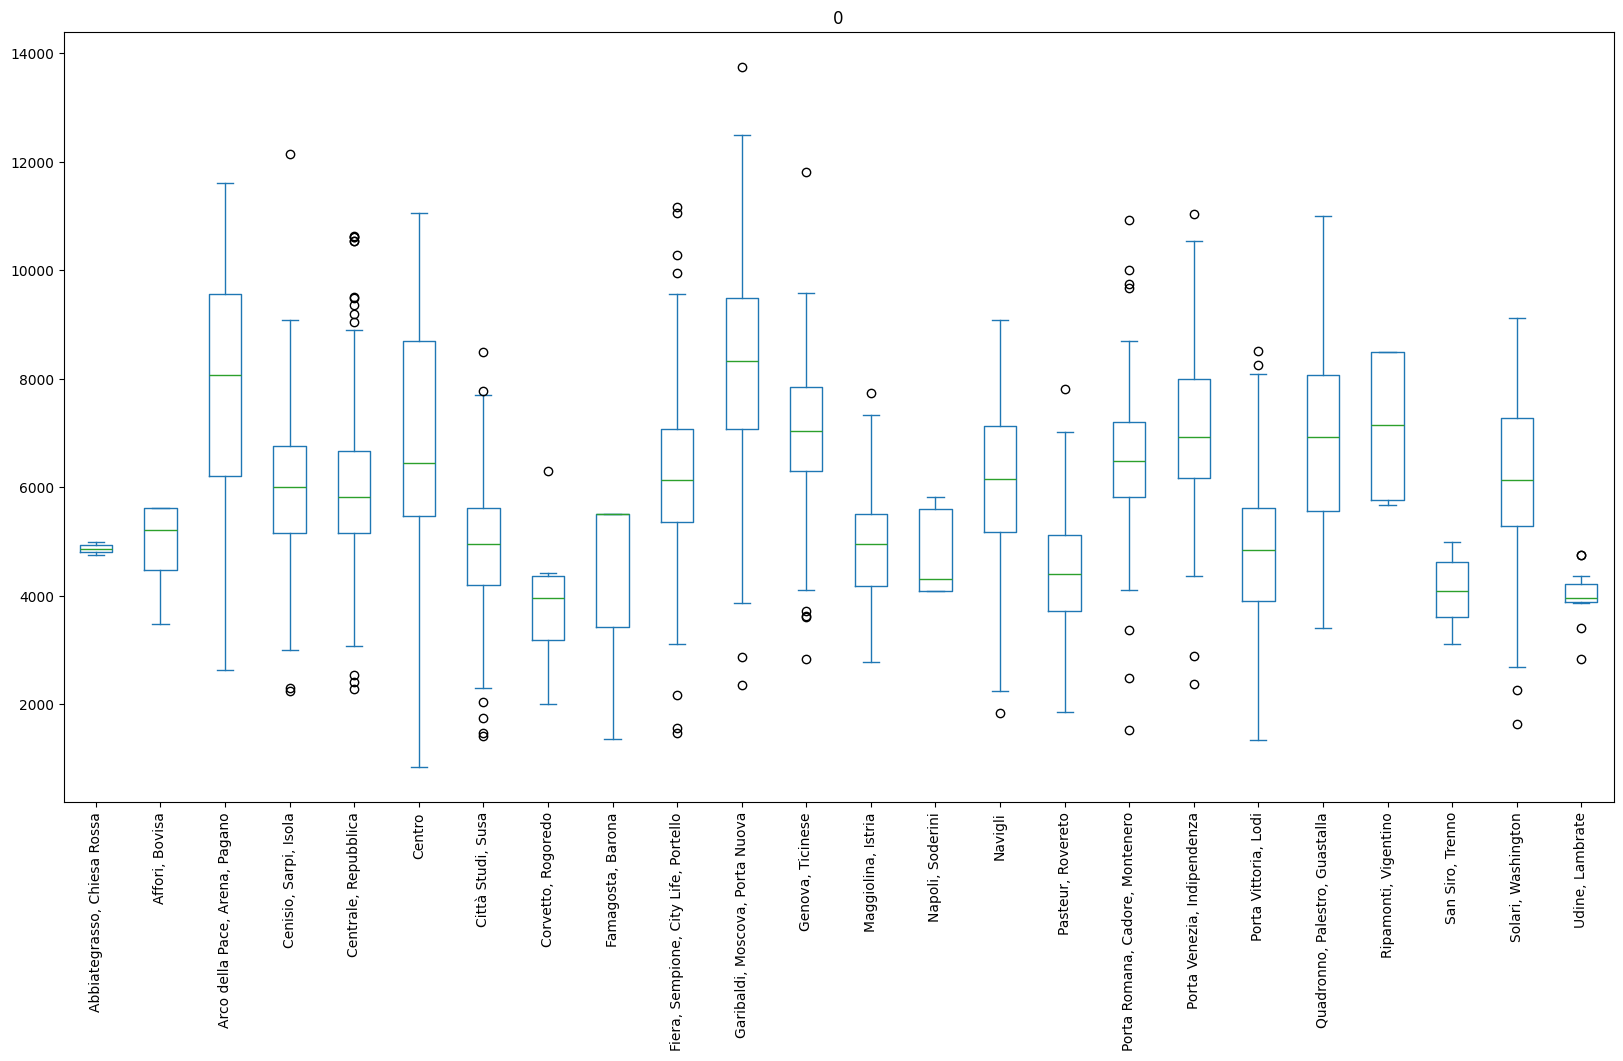

In [28]:

df[[0,1]].plot.box(by=1,figsize=(20,10), rot=90)

0       Axes(0.125,0.11;0.352273x0.77)
2    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

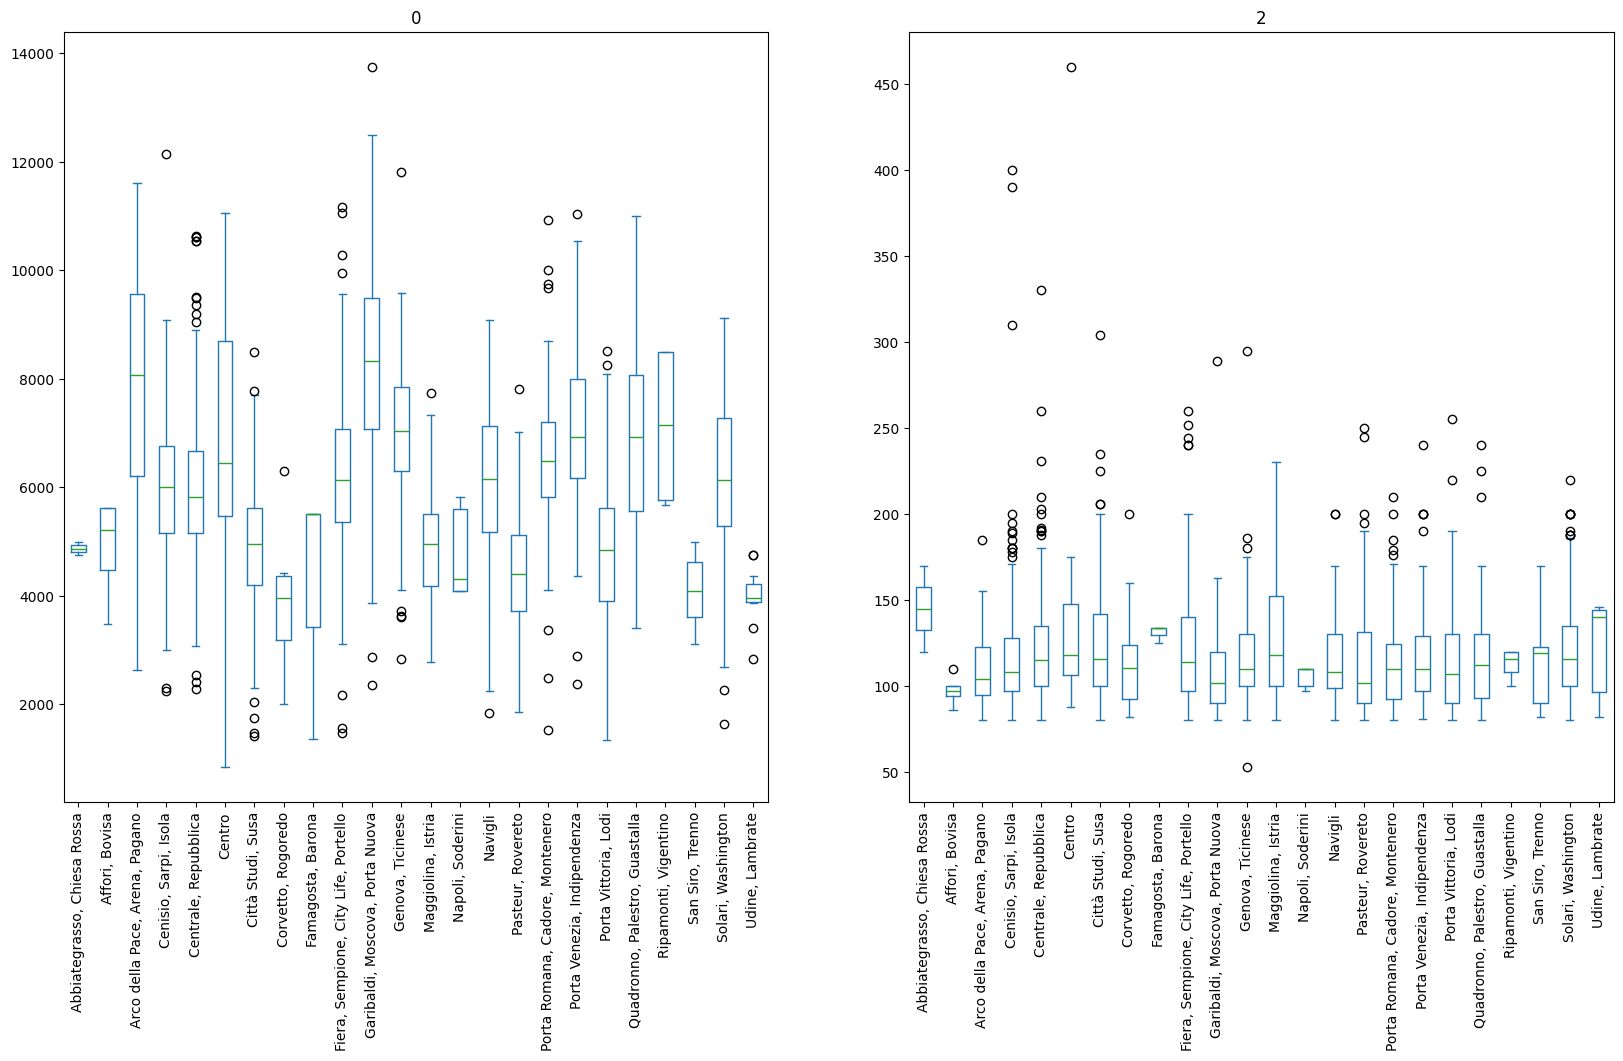

In [29]:
df.plot.box(by=1, rot =90, figsize=(20,10))

Quadronno, Palestro, Guastalla
Maggiolina, Istria
Città Studi, Susa
Navigli
Arco della Pace, Arena, Pagano


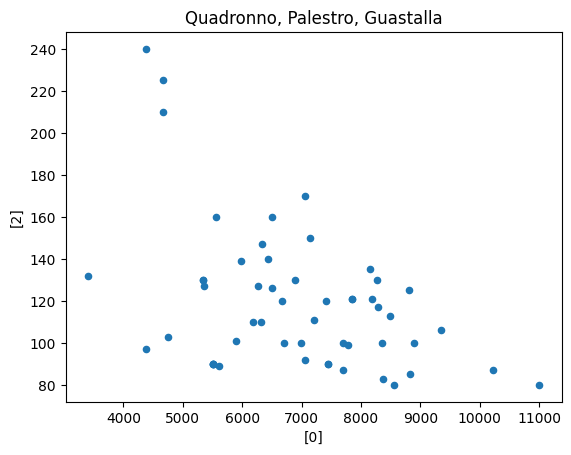

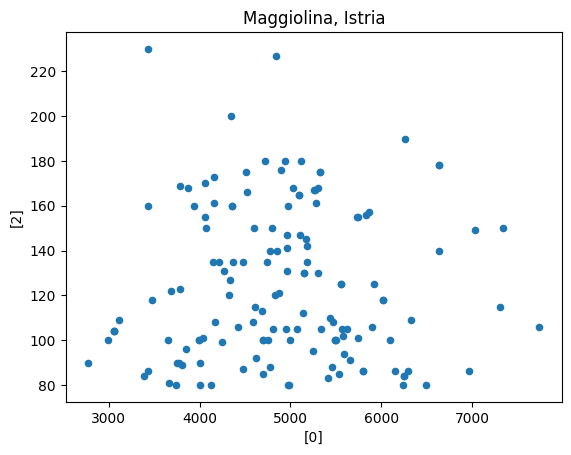

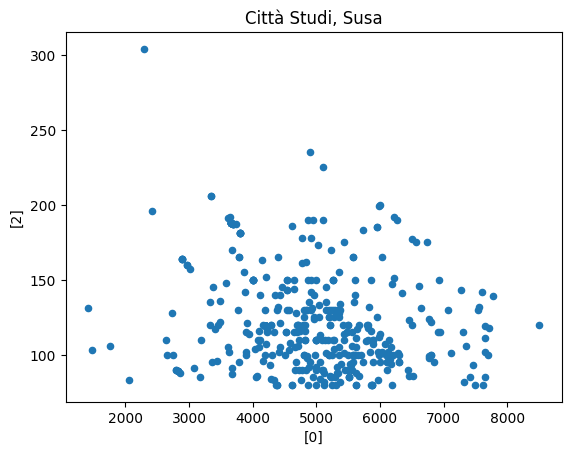

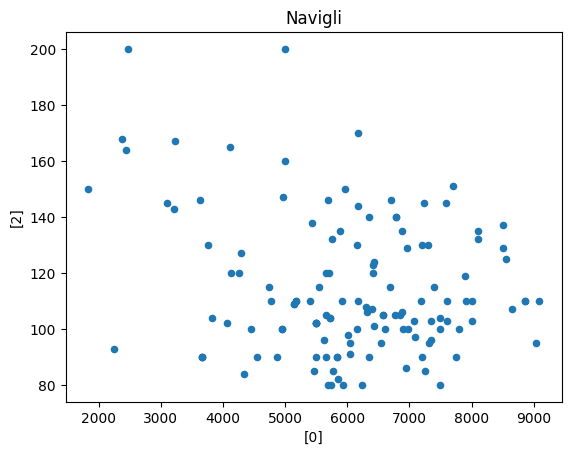

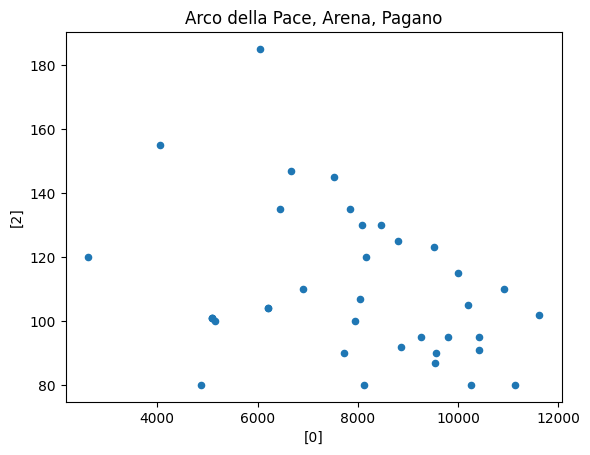

In [10]:
for c in df[1][0:5]:
    df[df[1]==c].plot.scatter(x=[0], y=[2], title=c)

In [62]:

import matplotlib.colors as mcolors
import random
colors = { x: mcolors.CSS4_COLORS[list(mcolors.CSS4_COLORS.keys())[random.randint(0,len(mcolors.CSS4_COLORS)-1)]] for x in df[1].unique()}

<Axes: xlabel='[0]', ylabel='[2]'>

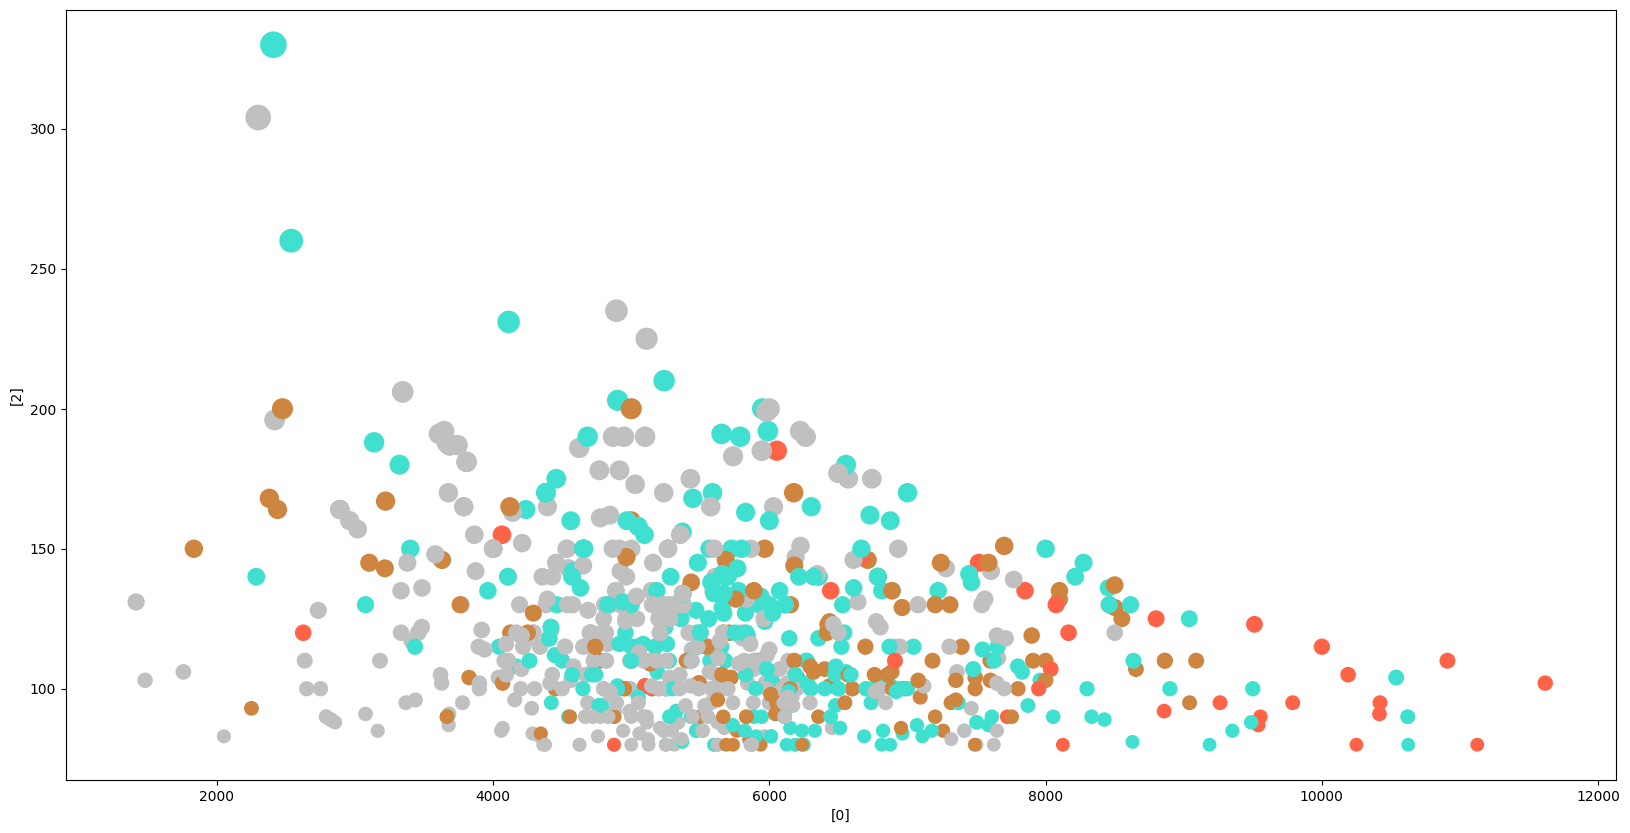

In [70]:
c = df[1].isin(df[1].unique()[2:6])
df[c].plot.scatter(x=[0], y=[2], c=df[c][1].map(colors), s=df[c][2], figsize=(20,10), legend=True)


In [60]:
df[df[1].isin(df[1].unique()[:5])][1]

0       Quadronno, Palestro, Guastalla
1                   Maggiolina, Istria
2                    Città Studi, Susa
3                              Navigli
4       Arco della Pace, Arena, Pagano
                     ...              
2371                 Città Studi, Susa
2372    Quadronno, Palestro, Guastalla
2375                 Città Studi, Susa
2377                Maggiolina, Istria
2381    Quadronno, Palestro, Guastalla
Name: 1, Length: 770, dtype: object